In [1]:
from simplicial import *

In [2]:
def sub_complete(G, order, loser):
    alpha, beta, gamma = list(order)
    if loser == 'a':
        init = order + loser
        G.add_edge(init, init + '~', gamma)
        G.add_edge(init, beta+gamma+alpha+'a', alpha)
        G.add_edge(init + '~', init, beta)
        G.add_edge(init + '~', beta+alpha+gamma+'b', alpha)
    if loser == 'b':
        init = order + loser
        G.add_edge(init, init + '~', beta)
        G.add_edge(init, init, gamma)
        G.add_edge(init + '~', alpha+gamma+beta+'a', gamma)
        G.add_edge(init + '~', gamma+alpha+beta+'b', alpha)

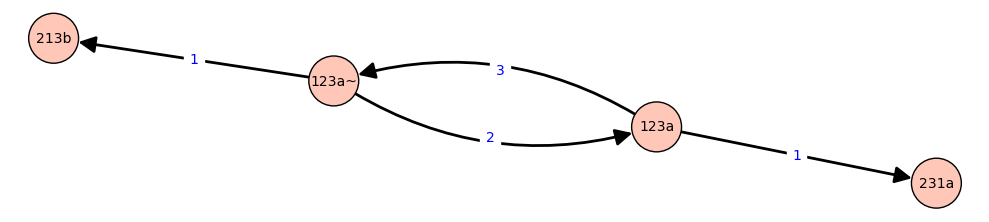

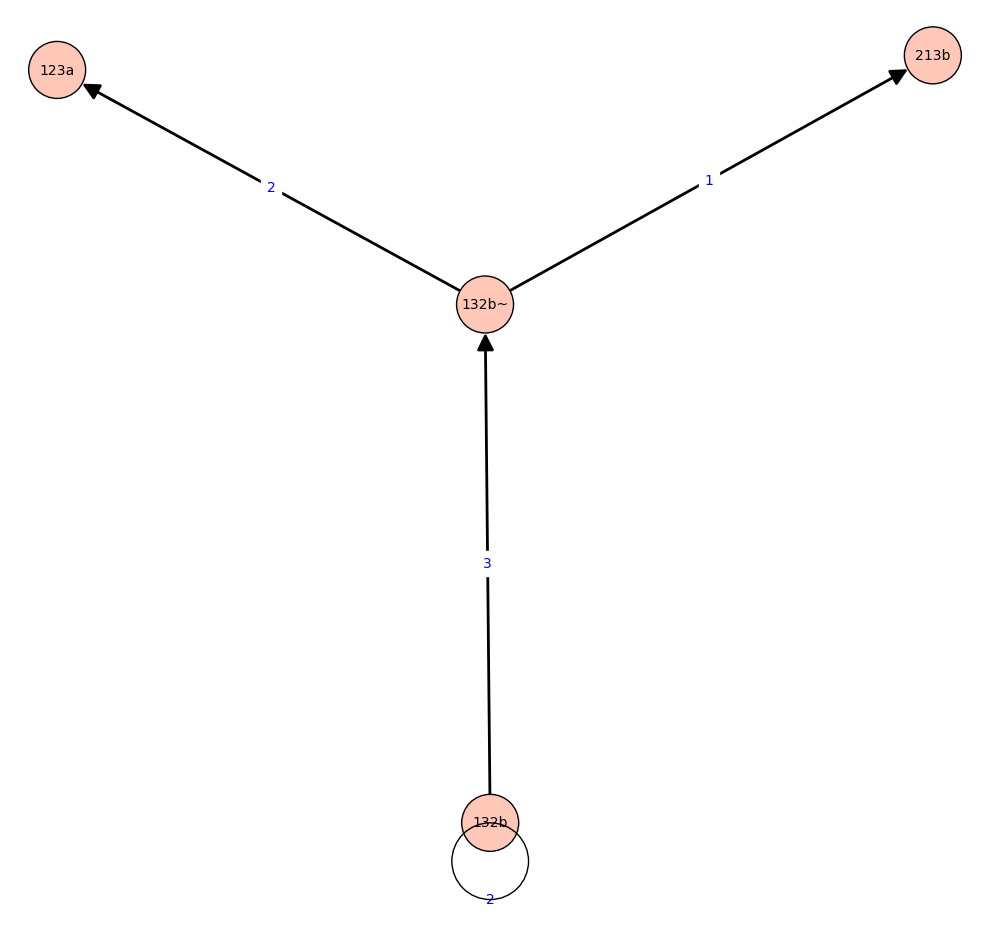

In [11]:
G = DiGraph(loops=True, multiedges=True)
sub_complete(G,'123','a')
G.show(figsize=[10,10], edge_labels=True)

G = DiGraph(loops=True, multiedges=True)
sub_complete(G,'132','b')
G.show(figsize=[10,10], edge_labels=True)

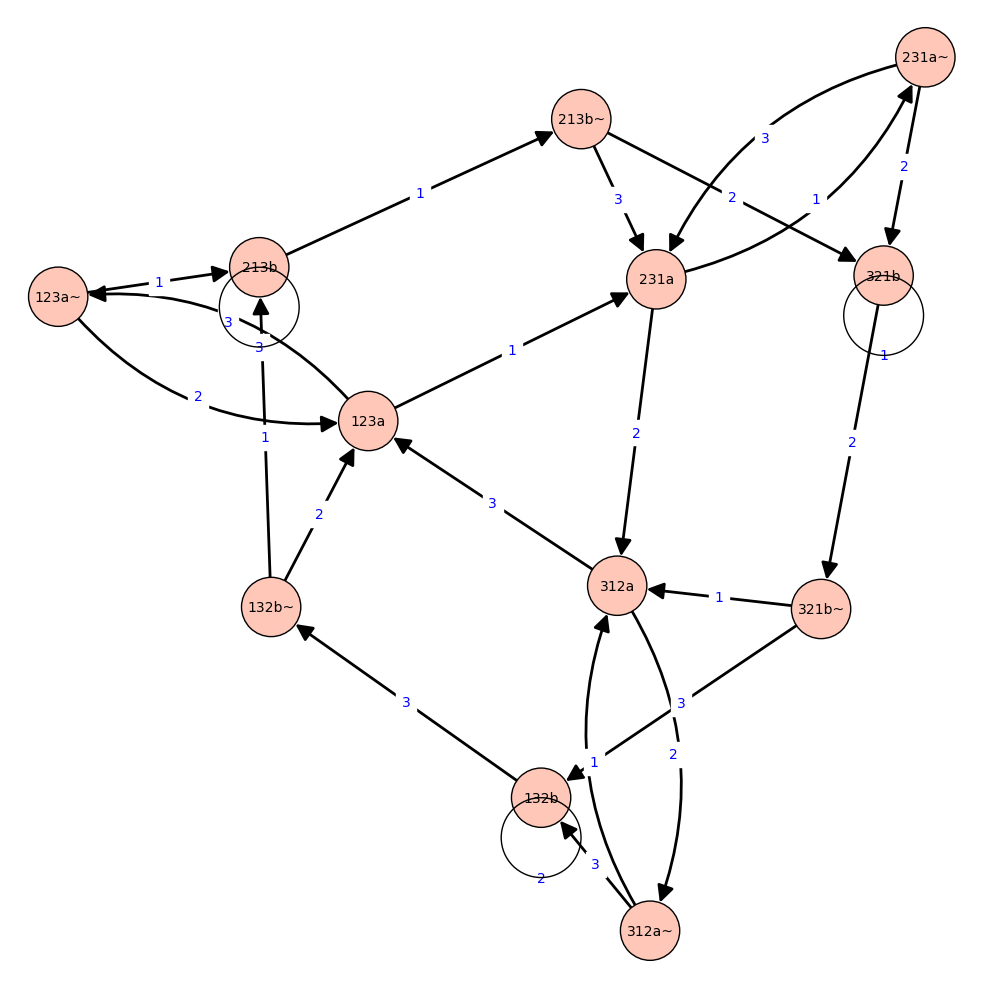

In [12]:
G = DiGraph(loops=True, multiedges=True)

for p in Permutations(3).list():
    for loser in ['a','b']:
        order = ''.join(str(x) for x in p)
        sub_complete(G,order,loser)
    
G0 = G.connected_components_subgraphs()[0]
G0.show(figsize=[10,10],edge_labels=True)
SS = SimplicialSystem(G0)

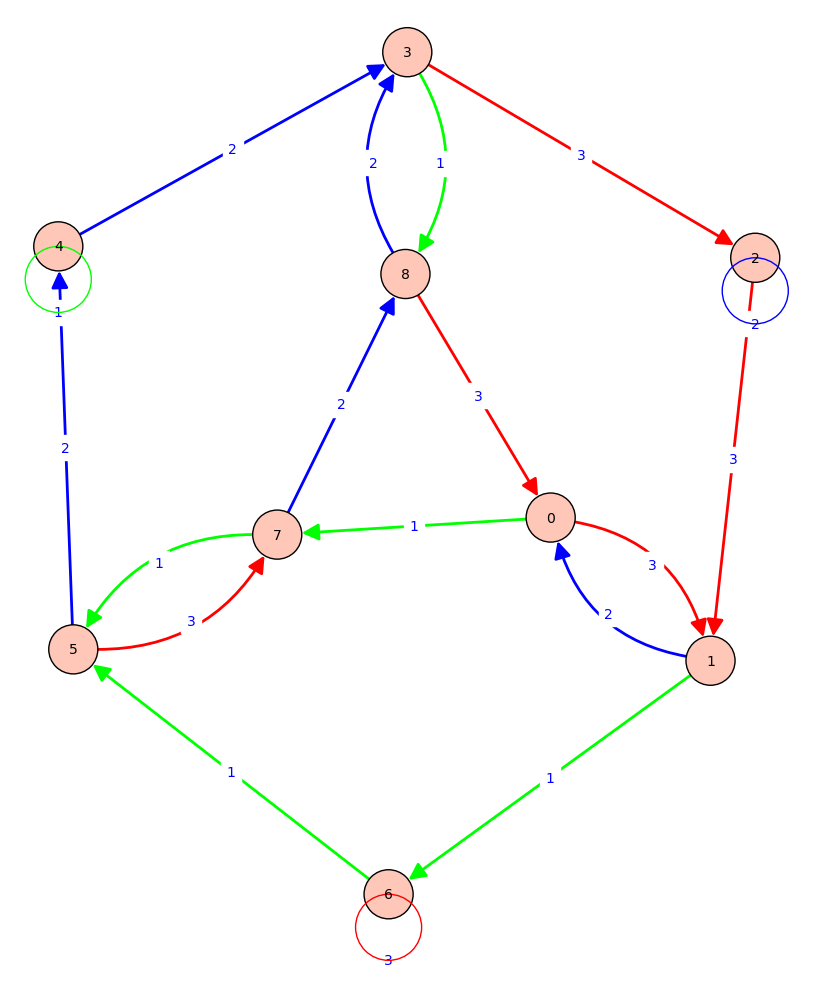

In [15]:
SS.dynamical_core().plot(figsize=[10,10])

In [5]:
def T(s):
    M = identity_matrix(3)
    for n in range(3):
        i = int(s[n])
        for m in range(n,3):
            j = int(str(s[m]))
            M[i-1,j-1] = 1
    return(M)

def JP(v0, pos):
    SS.pos = pos

    v = {str(i+1):v0[i] for i in range(3)}
    while SS.pos[0] == pos[0]:
        v,_ = SS.path(1,v=v,inplace=True)
    return vector(v.values()), SS.pos

def proj(v, pos):
    w = T(pos)*vector(v)
    alpha = int(pos[0])
    beta, gamma = (int(pos[1]), int(pos[2])) if pos[-1] == 'a' else (int(pos[2]), int(pos[1]))
    return(w[beta-1]/w[alpha-1], w[gamma-1]/w[alpha-1])

def f(x):
    return x-floor(x)

def JP1(x):
    return f(x[1]/x[0]), f(1/x[0])

In [7]:
v0 = vector([random() for _ in range(3)])
w = T('123')*v0
show(w)
x = ((w[1]/w[0], w[2]/w[0]))
show(x)
show(proj(v0,'123a'))

V = SS.vertex('123a')


(1.6919528592503912, 1.3730190805544504, 0.675589288743768)

(0.8114996071242538, 0.3992955743714299)

(0.8114996071242538, 0.3992955743714299)

In [10]:
v = {str(i+1):v0[i] for i in range(3)}
det_V = V.init_deterministic(v)


In [8]:
while SS.pos[0] == pos[0]:
    v,_ = SS.path(1,v=v,inplace=True)
    print(v, _)
print(SS.pos)
show(T(SS.pos)*vector([v[str(i+1)] for i in range(3)]))



AttributeError: 'SimplicialSystem' object has no attribute 'path'

In [10]:
v = vector([random() for _ in range(3)])
pos = '123a'
x = proj(v,pos)

for _ in range(20):
    if (norm(vector(proj(v,pos))-vector(x)) > 1e-10):
        print(proj(v,pos), x)
    v, pos = JP(v, pos)
    x = JP1(x)    


(0.9095686306643344, 0.015147855521090253) (0.9095686309580548, 0.01514785588970824)
(0.01665388955864331, 0.09942226049464346) (0.01665388995853221, 0.09942226013961486)
(0.9699123225567235, 0.046032878908063915) (0.9699121578906746, 0.046031437098250194)
(0.047460866139652294, 0.03102102813166064) (0.04745938766079341, 0.03102120317241841)
(0.6536127688943164, 0.06999052772293386) (0.6536368187920233, 0.07064691072928042)
(0.1070825587470289, 0.5299578704553912) (0.10808282015055692, 0.529901577221561)
(0.9490587137290953, 0.33858895137529404) (0.9027364060580583, 0.25216420710546394)
(0.35676291306034286, 0.053675589859707704) (0.27933315352438143, 0.10774307238439462)


In [119]:
JP1((0.2837345156593674, 0.664925139125419))

(0.343476392289486, 0.524421403846872)

In [30]:


JP1(x)

(0.21745330870018237, 0.8121306062946094)

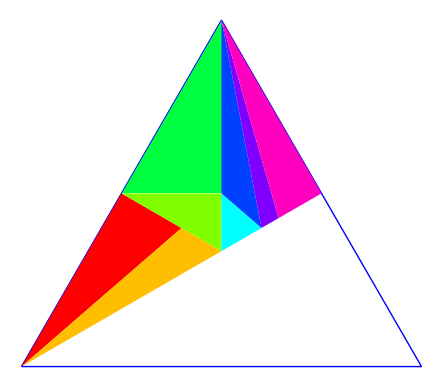

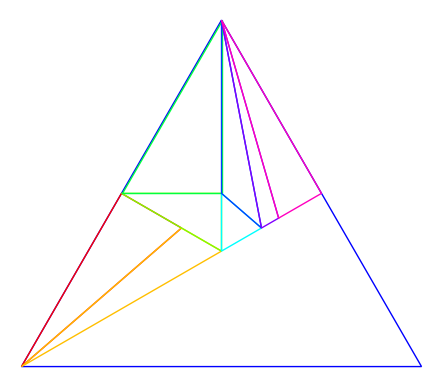

In [22]:
n = 3

SS.pos = 'b<c'
T1 = identity_matrix(3)
T1[2,1]=1
G1 = SS.decompose_simplex(n, leg=False, fill=True, T=T1)
G1.show()
G1 = SS.decompose_simplex(n, leg=False, fill=False, T=T1)
G1

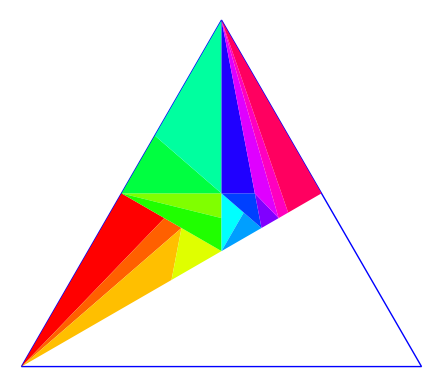

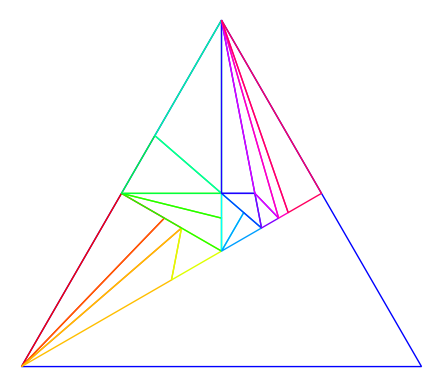

In [24]:
n = 4

SS.pos = 'b<c'
T1 = identity_matrix(3)
T1[2,1]=1
G1 = SS.decompose_simplex(n, leg=False, fill=True, T=T1)
G1.show()
G1 = SS.decompose_simplex(n, leg=False, fill=False, T=T1)
G1

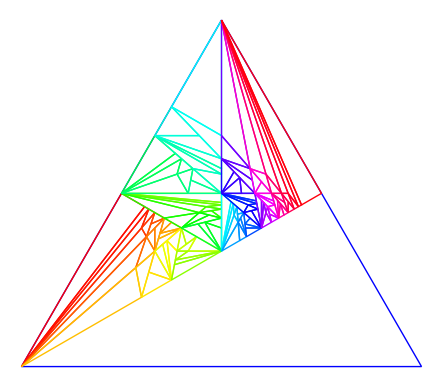

In [25]:
n = 7

SS.pos = 'b<c'
T1 = identity_matrix(3)
T1[2,1]=1
G1 = SS.decompose_simplex(n, leg=False, fill=False, T=T1)
G1

In [4]:
x = {x:random() for x in ['a','b','c']}
v = copy(x)

v['b'] += v['a']
v['c'] += v['b']

In [15]:
v = {'a':5, 'b':7, 'c':8}
v['c'] -= v['b']
print(v)
for n in range(1,7):
    print(SS.determinist_path(v, n, path_only=False)[0])
    print(SS.determinist_path(v, n, path_only=False)[-1])

In [16]:
print(v)
for n in range(1,7):
    print(SS.determinist_path(v, n, path_only=False)[0])
    print(SS.determinist_path(v, n, path_only=False)[-1])

{'a': 5, 'b': 7, 'c': 1}
{'a': 5, 'b': 2, 'c': 1}
b<c
{'a': 3, 'b': 2, 'c': 1}
b<c~
{'a': 2, 'b': 2, 'c': 1}
c<a
{'a': 2, 'b': 1, 'c': 1}
c<a~
{'a': 1, 'b': 1, 'c': 1}
c<b
{'a': 1, 'b': 1, 'c': 0}
a<b


In [18]:
v = {'a':5, 'b':7, 'c':13}
v['c'] -= v['b']
print(v)
for n in range(1,8):
    print(SS.determinist_path(v, n, path_only=False)[0])
    print(SS.determinist_path(v, n, path_only=False)[-1])

{'a': 5, 'b': 7, 'c': 6}
{'a': 5, 'b': 2, 'c': 6}
b<c
{'a': 3, 'b': 2, 'c': 6}
b<c~
{'a': 3, 'b': 2, 'c': 3}
b<a
{'a': 3, 'b': 2, 'c': 1}
b<a~
{'a': 2, 'b': 2, 'c': 1}
c<a
{'a': 2, 'b': 1, 'c': 1}
c<a~
{'a': 1, 'b': 1, 'c': 1}
c<b
